In [255]:
import random
import matplotlib.pyplot as plt
# importing train test spliter
from sklearn.model_selection import train_test_split

In [256]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [257]:
linguistic_variable = "linguistic variable"
Paramerters_S = "S"
Paramerters_M = "M"
y = "y"
type_Fuzzy_Set = "fuzzy set"
rule = "rule"   
structure = 'structure'
being = 'being'
not_list = 'not_list'
term_choice = 'term_choice'
elements = 'elements'
fitness = 'fitness'
gens = 'gens'
gen_num = 5
Max_S = 70   # 2 * 35   # calcualte the database
Min_S = 0
Max_M = 7    # 2*5
Min_M = -11  # 2*-5
element_num = 10
max_num_of_features = 5
linguistic = ["very low", "low", "medium", "high", "very high"]
num_of_chromosomes = 50
num_of_generations = 10
crossover_rate = 0.8
mutation_rate = 0.2
chart_fitness = []
max_mu = -10000000000


In [258]:
def chart():
    # Generate x-axis values using range() function
    x = range(len(chart_fitness))

    # Create line plot
    plt.plot(x, chart_fitness)

    # Add labels and title
    plt.xlabel('Index')
    plt.ylabel('fitness')
    plt.title('fitness of chromosome')

    # Show the plot
    plt.show()

In [259]:
# read and pre process the data set
def process_data(sms_data_str):
    """
    convert `sms_data_str` into a pandas dataframe
    """
    data_arr = []

    data_records = sms_data_str.split('\n')[:-1]
    for data in data_records:
        label = None
        sample = None
        data_type = data[:3]
        if data_type == 'ham':
            label = 'legitimate'
            sample = data[4:]
        elif data_type == 'spa':
            label = 'spam'
            sample = data[5:]
        else:
            label = 'N/A'

        data_arr.append([label, sample])

    data_arr = np.array(data_arr)
    data_label = data_arr[:, 0]
    data_records = data_arr[:, 1]

    return data_records, data_label
# extract feature from SMS


def tfidf_vectorizer(records):
    vectorizer = TfidfVectorizer(
        lowercase=True,
        token_pattern=r'\b[A-Za-z]+\b',
        norm=None
    )

    records_transformed = vectorizer.fit_transform(records)

    return records_transformed.toarray(), vectorizer.get_feature_names_out()


# decrece the dimension
def feature_extraction(X, n_components=5):
    reduction_pca = PCA(
        n_components=n_components,
        whiten=False
    )
    data_reduced = reduction_pca.fit_transform(X)
    return data_reduced

# select the feature


def feature_selection(df_records, labels, n_components=5):
    feature_selection_model = SelectKBest(mutual_info_classif, k=n_components)
    # make a selection over the best features
    selected_record_features = feature_selection_model.fit_transform(
        df_records, labels)

    return selected_record_features, feature_selection_model.get_feature_names_out()

In [260]:
# read data
sms_data_str = None
with open('SMSSpamCollection') as file:
    sms_data_str = file.read()

In [261]:
# extract feature
records, labels = process_data(sms_data_str)
records_vectorized, feature_names = tfidf_vectorizer(records)

# one hot encoding labels (convert label to 0 or 1)
labels = np.array([0 if y == 'legitimate' else 1 for y in labels])

# reducing dimension
records_dim_reduced = feature_extraction(records_vectorized)

In [262]:
print(records_dim_reduced)
print(type(records_dim_reduced))
len(records_dim_reduced)

[[-1.85636946  0.28415437 -1.18442254  0.82362636  0.72020232]
 [-2.78399363  0.52118405 -1.74218985  0.50226234 -0.73373747]
 [ 0.48303797 -0.03698638  2.01129674 -6.53508409  1.05775729]
 ...
 [-0.86644349 -0.05228916 -0.21747065  0.80896794  0.73512777]
 [ 4.01997398  0.15985396 -1.33561192 -0.3035973   1.10358525]
 [-2.03428721  0.3838005   0.19992115 -0.08830948  0.16366489]]
<class 'numpy.ndarray'>


5574

In [263]:
# read data
# open the file for reading
labels = []
with open('SMSSpamCollection', 'r') as f:

    for line in f:
        # split the line into words
        words = line.split()
        # select the first word
        first_word = words[0]
        if words[0] == 'ham':
            labels.append(0)
        else:
            labels.append(1)

print(labels)
# find number of zero in labels
print(labels.count(0))
# find number of one in labels
print(labels.count(1))

# find the index of zero in labels
zero_index = [i for i, x in enumerate(labels) if x == 1]
print(zero_index)
# find the index of one in labels
one_index = [i for i, x in enumerate(labels) if x == 0]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [264]:
# This function creates a list of chromosomes.
def create_chromosomes(num_chromosomes):
    # Initialize an empty list to store the chromosomes.
    chromosomes = []
    
    # For each chromosome:
    for i in range(num_chromosomes):
        # Initialize an empty dictionary to store this chromosome's genetic material.
        chro = dict()
        chro[structure] = []
        # For each genetic element (gene) in the chromosome:
        for _ in range(gen_num):
            # Initialize an empty dictionary to store this gene's features (linguistic variable, parameter S, parameter M, and type of fuzzy set).
            gen = dict()
            # Generate a random number between 3 and 5 to determine the number of linguistic variables in this feature.
            num_feature = random.randint(3, 5)
            # For each linguistic variable in this feature, randomly choose one from the set of possible linguistic variables and add it to the list of linguistic variables in this feature.
            gen[linguistic_variable] = [random.choice(linguistic) for i in range(num_feature)]
            # For each parameter S in this feature, randomly generate a floating-point number between Min_S and Max_S and add it to the list of S parameters in this feature.
            gen[Paramerters_S] = [random.uniform(Min_S, Max_S) for i in range(num_feature)]
            # For each parameter M in this feature, randomly generate a floating-point number between Min_M and Max_M and add it to the list of M parameters in this feature.
            gen[Paramerters_M] = [random.uniform(Min_M, Max_M) for i in range(num_feature)]
            # For each type of fuzzy set in this feature, randomly generate an integer between 1 and 4 and add it to the list of fuzzy set types in this feature.
            gen[type_Fuzzy_Set] = [random.randint(1, 4) for i in range(num_feature)]
            for i in range(num_feature):
                if gen[type_Fuzzy_Set][i] == 1:
                    gen[Paramerters_S][i] = abs(gen[Paramerters_S][i])                    
            # Add the current gene (with its features) to this chromosome.
            chro[structure].append(gen)
        
        # Initialize an empty dictionary to store the rule for this chromosome's genetic material.
        gen_rule = dict()
        # For each genetic element (gene) in the chromosome:
        gen_rule[being] = [random.choice([0, 1]) for i in range(gen_num)]     # 1 ==> be   0 ==> not be
        gen_rule[not_list] = [random.choice([0, 1]) for i in range(gen_num)]  # 1 ==> NOT   0 ==> self
        gen_rule[term_choice] = [random.choice(chro[structure][i][linguistic_variable]) for i in range(gen_num)]   # which term?
        gen_rule[y] = random.choice([0, 1])   # ham or spam
        # Add the rule to this chromosome.
        chro[rule] = gen_rule  
        
        chro[fitness] = 0
        # Add this chromosome (with its genetic material and rule) to the list of chromosomes.
        chromosomes.append(chro)
        
    # Return the list of chromosomes.
    return chromosomes

In [265]:
chro = create_chromosomes(2)
print(len(chro[0]))
# print(chro[0][structure][0][linguistic_variable])
# print(chro[1][structure][0])

parent1 = chro[0]
parent2 = chro[1]
print(parent1)
print(parent2)

#print(chro[0][structure][0][Paramerters_S])
#print(chro[0][structure][1][Paramerters_S])
# print(parent1)
# print(parent2)
# parent1_linguistic = chro[0][structure][0][linguistic_variable]
# parent2_linguistic = chro[1][structure][0][linguistic_variable]

# parent1_S = chro[0][structure][0][Paramerters_S]
# parent2_S = chro[1][structure][0][Paramerters_S]

# parent1_M = chro[0][structure][0][Paramerters_M]
# parent2_M = chro[1][structure][0][Paramerters_M]

# parent1_fuzzy = chro[0][structure][0][type_Fuzzy_Set]
# parent2_fuzzy = chro[1][structure][0][type_Fuzzy_Set]

# parent1_bein = chro[0][rule][being]
# parent2_bein = chro[1][rule][being]

# parent1_not_list = chro[0][rule][not_list]
# parent2_not_list = chro[1][rule][not_list]

# parent1_term_choice = chro[0][rule][term_choice]
# parent2_term_choice = chro[1][rule][term_choice]


3
{'structure': [{'linguistic variable': ['low', 'high', 'medium', 'low'], 'S': [46.457989940712196, 15.415746832456621, 51.391750250101154, 2.8233384671469306], 'M': [4.117892880954567, -4.688792336212742, 0.721283477967992, 4.785616567272475], 'fuzzy set': [1, 3, 2, 4]}, {'linguistic variable': ['high', 'very high', 'low', 'very low', 'low'], 'S': [13.626261420488108, 50.69785313418288, 56.300134949109356, 20.828040514045345, 2.6967137776737715], 'M': [-3.397535735826896, -5.200538760413904, -1.8655876427249076, 4.375517903359047, 5.364312656278823], 'fuzzy set': [2, 1, 3, 4, 3]}, {'linguistic variable': ['very low', 'very low', 'very low', 'very high'], 'S': [20.11095132626685, 49.10663960965962, 18.569172516855538, 18.06569152711574], 'M': [-5.521436610015835, -4.991635203294553, -10.224932349836171, -3.6556259341551485], 'fuzzy set': [1, 3, 3, 1]}, {'linguistic variable': ['very low', 'medium', 'very high', 'very low', 'low'], 'S': [20.95217624374254, 67.19603004089274, 24.1403221

In [266]:
# This function takes in two parents (sequences) and creates two offsprings by performing a continuous crossover.
def crossover_continuous(parent1, parent2):    
    # Set the alpha value for the crossover.
    alpha = 0.25
    offspring1 = []
    offspring2 = []
    # If the first sequence is longer than the second one:
    if len(parent1) > len(parent2):
        # Generate a list of random indexes for the shorter sequence.
        indexes = random.sample(range(len(parent1)), len(parent2))
        # For each index in the shorter parent: if the corresponding element in the longer parent is greater, perform a crossover calculation using alpha and add the results to offspring1 and offspring2. Otherwise, perform the calculation using the reverse order and add the results to offspring1 and offspring2.
        for i in range(len(parent2)):
            if parent2[i] > parent1[indexes[i]]:
                distance = parent2[i] - parent1[indexes[i]]
                offspring1.append(parent1[indexes[i]] + alpha * distance)
                offspring2.append(parent2[i] - alpha * distance)
            else:
                distance = parent1[indexes[i]] - parent2[i]
                offspring2.append(parent2[i] + alpha * distance)
                offspring1.append(parent1[indexes[i]] - alpha * distance)
                
        # Add the remaining elements of the longer parent to the first offspring.     
        temp = [item for item in [_ for _ in range(len(parent1))] if item not in indexes]
        for i in range(len(temp)):
            offspring1.append(parent1[temp[i]])
        
    # If the second sequence is longer than or the same length as the first one:
    else:
        # Generate a list of random indexes for the shorter sequence.
        indexes = random.sample(range(len(parent2)), len(parent1))
        # For each index in the shorter parent: if the corresponding element in the longer parent is greater, perform a crossover calculation using alpha and add the results to offspring1 and offspring2. Otherwise, perform the calculation using the reverse order and add the results to offspring1 and offspring2.
        for i in range(len(parent1)):
            if parent1[i] > parent2[indexes[i]]:
                distance = parent1[i] - parent2[indexes[i]]
                offspring2.append(parent2[indexes[i]] + alpha * distance)
                offspring1.append(parent1[i] - alpha * distance)
            else:
                distance = parent2[indexes[i]] - parent1[i]
                offspring1.append(parent1[i] + alpha * distance)
                offspring2.append(parent2[indexes[i]] - alpha * distance)
                
        # Add the remaining elements of the longer parent to the second offspring. 
        temp = [item for item in [_ for _ in range(len(parent2))] if item not in indexes]
        for i in range(len(temp)):
            offspring2.append(parent2[temp[i]])
    
    # Return the two new offspring.
    return offspring1, offspring2

In [267]:
# This function takes in two parents (sequences) and creates two offsprings by performing a discrete crossover.
def crossover_discrete(parent1, parent2):   
    offspring1 = []
    offspring2 = []
    # If the first sequence is longer than the second one:
    if len(parent1) > len(parent2):
        # Generate a list of random indexes for the shorter sequence.
        indexes = random.sample(range(len(parent1)), len(parent2))
        # For each index in parent1: if it's in indexes, add the corresponding element to offspring2. Otherwise, add it to offspring1. 
        for i in range(len(parent1)):
            if i in indexes:
                offspring2.append(parent1[i])
            else:
                offspring1.append(parent1[i])
        # Add all of parent2 to offspring1.
        offspring1.extend(parent2)     
    # If the second sequence is longer than or the same length as the first one:
    else:
        # Generate a list of random indexes for the shorter sequence.
        indexes = random.sample(range(len(parent2)), len(parent1))
        # For each index in parent2: if it's in indexes, add the corresponding element to offspring1. Otherwise, add it to offspring2. 
        for i in range(len(parent2)):
            if i in indexes:
                offspring1.append(parent2[i])
            else:
                offspring2.append(parent2[i])
        # Add all of parent1 to offspring2.
        offspring2.extend(parent1)
    
    # Return the two new offspring.
    return offspring1, offspring2 


In [268]:
def crossover_term_choice(parent1, parent2, structure1, structure2):
    child1, child2 = crossover_discrete(parent1, parent2)
    for i in range(len(child1)):
        if child1[i] not in structure1[i][linguistic_variable]:
            child1[i] = random.choice(structure1[i][linguistic_variable])
    
    for i in range(len(child2)):
        if child2[i] not in structure2[i][linguistic_variable]:
            child2[i] = random.choice(structure2[i][linguistic_variable])
    
    return child1, child2

In [269]:
def crossover(parent1, parent2):
    structure1 = [dict() for i in range(max_num_of_features)]
    structure2 = [dict() for i in range(max_num_of_features)]
    
    for i in range(max_num_of_features):
        structure1[i][linguistic_variable], structure2[i][linguistic_variable] = crossover_discrete(parent1[structure][i][linguistic_variable], parent2[structure][i][linguistic_variable])
        structure1[i][type_Fuzzy_Set], structure2[i][type_Fuzzy_Set] = crossover_discrete(parent1[structure][i][type_Fuzzy_Set], parent2[structure][i][type_Fuzzy_Set])
        structure1[i][Paramerters_M], structure2[i][Paramerters_M] = crossover_continuous(parent1[structure][i][Paramerters_M], parent2[structure][i][Paramerters_M])
        structure1[i][Paramerters_S], structure2[i][Paramerters_S] = crossover_continuous(parent1[structure][i][Paramerters_S], parent2[structure][i][Paramerters_S])

        for j in range(len(structure1[i][type_Fuzzy_Set])):
            if structure1[i][type_Fuzzy_Set][j] == 1:
                structure1[i][type_Fuzzy_Set][j] = abs(structure1[i][type_Fuzzy_Set][j])
        
        for j in range(len(structure2[i][type_Fuzzy_Set])):
            if structure2[i][type_Fuzzy_Set][j] == 1:
                structure2[i][type_Fuzzy_Set][j] = abs(structure2[i][type_Fuzzy_Set][j])
    
    rule1 = dict()
    rule2 = dict()
    
    rule1[being], rule2[being] = crossover_discrete(parent1[rule][being], parent2[rule][being])
    rule1[not_list], rule2[not_list] = crossover_discrete(parent1[rule][not_list], parent2[rule][not_list])
    rule1[term_choice], rule2[term_choice] = crossover_term_choice(parent1[rule][term_choice], parent2[rule][term_choice], structure1, structure2)
    
    rule1[y], rule2[y] = parent2[rule][y], parent1[rule][y]
    
    offspring1 = dict()
    offspring1[structure] = structure1
    offspring1[rule] = rule1
    
    offspring2 = dict()
    offspring2[structure] = structure2
    offspring2[rule] = rule2
    
    return offspring1, offspring2

In [270]:
def mutation_linguistic(parent):
    for i in range(len(parent)):
        if random.uniform(0, 1) < mutation_rate:
            parent[i] = random.choice(linguistic)   
        else:
            pass
    return parent

In [271]:
def mutation_S(parent):
    for i in range(len(parent)):
        if random.uniform(0, 1) < mutation_rate:
            parent[i] = random.uniform(Max_S, Min_S)
        else:
            pass
    return parent

In [272]:
def mutation_M(parent):
    for i in range(len(parent)):
        if random.uniform(0, 1) < mutation_rate:
            parent[i] = random.uniform(Max_M, Min_M)
        else:
            pass
    return parent

In [273]:
def mutation_fuzzy(parent):
    for i in range(len(parent)):
        if random.uniform(0, 1) < mutation_rate:
            parent[i] = random.randint(1, 4) 
        else:
            pass
    return parent

In [274]:
def mutation_being_notList(parent):
    for i in range(len(parent[being])):
        if random.uniform(0, 1) < mutation_rate:
            parent[being][i] = parent[being][i] * -1 + 1
        else:
            pass
    
    for i in range(len(parent[not_list])):
        if random.uniform(0, 1) < mutation_rate:
            parent[not_list][i] = parent[not_list][i] * -1 + 1
        else:
            pass
        
    return parent

In [275]:
def mutation_term_choice(parent):
    for i in range(len(parent[rule][term_choice])):
        if random.uniform(0, 1) < mutation_rate:
            parent[rule][term_choice][i] = random.choice(parent[structure][i][linguistic_variable])
        else:
            pass
    return parent[rule][term_choice]

In [276]:
def mutation(parent):
    for i in range(gen_num):
        parent[structure][i][linguistic_variable] = mutation_linguistic(parent[structure][i][linguistic_variable])
        parent[structure][i][type_Fuzzy_Set] = mutation_fuzzy(parent[structure][i][type_Fuzzy_Set])
        parent[structure][i][Paramerters_M] = mutation_M(parent[structure][i][Paramerters_M])
        parent[structure][i][Paramerters_S] = mutation_S(parent[structure][i][Paramerters_S])
        
        for j in range(len(parent[structure][i][type_Fuzzy_Set])):
            if parent[structure][i][type_Fuzzy_Set][j] == 1:
                parent[structure][i][type_Fuzzy_Set][j] = abs(parent[structure][i][type_Fuzzy_Set][j])
    
    parent[rule] = mutation_being_notList(parent[rule])
    parent[rule][term_choice] = mutation_term_choice(parent)
    
    if random.uniform(0, 1) < mutation_rate:
        parent[rule][y] = parent[rule][y] * -1 + 1

    
    return parent

In [277]:
len(parent2[structure])

5

In [278]:
print(parent1)
print(parent2)
child1, child2 = crossover(parent1, parent2)
print(child1)
print(child2)
print(child1[structure][0][Paramerters_S])
print(child2[structure][0][Paramerters_S])
child1 = mutation(child1)
child2 = mutation(child2)
child1[structure][0][Paramerters_S].sort()
print(child1[structure][0][Paramerters_S])
print(child2[structure][0][Paramerters_S])

{'structure': [{'linguistic variable': ['low', 'high', 'medium', 'low'], 'S': [46.457989940712196, 15.415746832456621, 51.391750250101154, 2.8233384671469306], 'M': [4.117892880954567, -4.688792336212742, 0.721283477967992, 4.785616567272475], 'fuzzy set': [1, 3, 2, 4]}, {'linguistic variable': ['high', 'very high', 'low', 'very low', 'low'], 'S': [13.626261420488108, 50.69785313418288, 56.300134949109356, 20.828040514045345, 2.6967137776737715], 'M': [-3.397535735826896, -5.200538760413904, -1.8655876427249076, 4.375517903359047, 5.364312656278823], 'fuzzy set': [2, 1, 3, 4, 3]}, {'linguistic variable': ['very low', 'very low', 'very low', 'very high'], 'S': [20.11095132626685, 49.10663960965962, 18.569172516855538, 18.06569152711574], 'M': [-5.521436610015835, -4.991635203294553, -10.224932349836171, -3.6556259341551485], 'fuzzy set': [1, 3, 3, 1]}, {'linguistic variable': ['very low', 'medium', 'very high', 'very low', 'low'], 'S': [20.95217624374254, 67.19603004089274, 24.140322130

In [279]:
def isosceles_triangular_fuzzy(x, m, s):
    if isinstance(x, (int, float)):
        return max(min((x - m) / s, (m - x) / s), 0)
    else:
        return np.max(np.min((x - m) / s, (m - x) / s), 0)


def trapezoids_of_Malzawie_fuzzy(x, m, s):
    if isinstance(x, (int, float)):
        return max(min((x - m) / s, 1), 0)
    else:
        return np.max(np.min((x - m) / s, 1), 0)


def gaussian_fuzzy(x, m, s):
    return np.exp(-0.5 * ((x - m) / s) ** 2)


def sigmoid_fuzzy(x, m, s):
    return 1 / (1 + np.exp((m - x) / s))
# def Fc(R,numberOfrule):


# def Fneg(Ruls,numberOfrule):
#     for i in range(numberOfrule):
#         pass

def gR(xP, muA):
    result = 1
    for i in range(len(xP)):
        result *= muA[i] * xP[i]
    return result



    
    result = 0
    for i in range(len(LOFL_xP)):
        result += gR(LOFL_xP[i], LOFL_muA[i])
    return result


def Fc(LOFL_xP, LOFL_muA, numberOfrule):  #
    result = 0
    for i in range(len(LOFL_xP)):
        result += gR(LOFL_xP[i], LOFL_muA[i])
    return result


def Fneg(LOFL_xP, LOFL_muA, number_another_rule):   # r = number_another_rule

    return Fc(LOFL_xP, LOFL_muA, number_another_rule)


def CF(LOFL_xP, LOFL_muA, numberOfrule):  # also we are detect gole class is zero or one
    fneg_Rj = Fneg(LOFL_xP, LOFL_xP, abs(5574-numberOfrule))
    fc_Rj = Fc(LOFL_xP, LOFL_muA, numberOfrule)
    return (fc_Rj - fneg_Rj) / (fc_Rj + fneg_Rj)

In [280]:
def Gr(xP, parent): # parent is one chromosome
    global max_mu
    gr = 1.0
    Mu_temp = []
    M = []
    S = []
    fuzzy_function = []   # [4, 3]
    indexes_being = [j for j, x in enumerate(parent[rule][being]) if x == 0]
    indexes_not = [j for j, x in enumerate(parent[rule][not_list]) if x == 1]
    for i in range(gen_num):
        if i in indexes_being:
            pass
        else:
            # indices  list of index where have multi equal value  E.g == > [0, 1]
            indexes_terms = [k for k, x in enumerate(parent[structure][i][linguistic_variable]) if x == parent[rule][term_choice][i]]
            # indexes_terms = []
            # for k in range(len(parent[structure][i][linguistic_variable])):
            #     if parent[structure][i][linguistic_variable][k] == parent[rule][term_choice][i]:
            #         indexes_terms.append(k)
            
            a = 0
            if len(indexes_terms) == 0:
                a = random.randint(0, len(parent[structure][i][linguistic_variable]) - 1)
                indexes_terms.append(a)
                parent[rule][term_choice][i] = parent[structure][i][linguistic_variable][a]
                
            for index in indexes_terms:  # find the fuzzy set  E.g [4, 3]
                fuzzy_function.append(parent[structure][i][type_Fuzzy_Set][index])
                M.append(parent[structure][i][Paramerters_M][index])
                S.append(parent[structure][i][Paramerters_S][index])
                
            for j in range(len(fuzzy_function)): # select the function fuzzy
                if fuzzy_function[j] == 1:
                    Mu_temp.append(isosceles_triangular_fuzzy(xP[i], M[j], S[j]))
                elif fuzzy_function[j] == 2:
                    Mu_temp.append(trapezoids_of_Malzawie_fuzzy(xP[i], M[j], S[j]))
                elif fuzzy_function[j] == 3:
                    Mu_temp.append(gaussian_fuzzy(xP[i], M[j], S[j]))
                elif fuzzy_function[j] == 4:
                    Mu_temp.append(sigmoid_fuzzy(xP[i], M[j], S[j]))
                else:
                    print('error', fuzzy_function[j])
                            
                if i in indexes_not:
                    Mu_temp[-1] = max_mu - Mu_temp[-1]
                
                if Mu_temp[-1] > max_mu:
                    max_mu = Mu_temp[-1]
               
            gr *= (max(Mu_temp))
            Mu_temp.clear()
            fuzzy_function.clear()
            S.clear()
            M.clear()

    return gr

In [281]:
def fitness_function(parent):
    Fc = 0.0
    Fneg = 0.0
    for i in range(len(records_dim_reduced)):  
        if labels[i] == parent[rule][y]:
            Fc += Gr(records_dim_reduced[i], parent)
        else:
            Fneg += Gr(records_dim_reduced[i], parent)
    
    # print('Fc', Fc)
    # print('Fneg', Fneg)
    if (Fneg + Fc) != 0:
        CF = abs(Fc - Fneg) / abs(Fneg + Fc)
    else:
        CF = 0
        
    return CF

In [282]:
def evalate_fitness(population):
    for i in range(len(population)):  
        population[i][fitness] = fitness_function(population[i])
    
    return population

In [283]:
def create_childs(population):
    new_population = []
    size = int(crossover_rate * num_of_chromosomes / 2)
    for i in range(size):
        child1, child2 = crossover(population[2*i], population[2*i+1])
        child1 = mutation(child1)
        child2 = mutation(child2)
        child1[fitness] = 0
        child2[fitness] = 0
        
        new_population.append(child1)
        new_population.append(child2)
    
    new_population = evalate_fitness(new_population)
    
    return new_population

In [284]:
def select_surviver(population, new_generation):
    population.extend(new_generation)
    population.sort(key=lambda x: x[fitness], reverse=True)
    return population[:50]

In [285]:
# splitting record_dim_reduced into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(records_dim_reduced, labels, test_size=0.2, random_state=0)


In [286]:
def GA():
    records_dim_reduced = X_train
    labels = y_train

    population = create_chromosomes(num_of_chromosomes)
    population = evalate_fitness(population)
    population.sort(key=lambda x: x[fitness], reverse=True)
    chart_fitness.append(sum([x[fitness] for x in population]) / num_of_chromosomes)

    for _ in range(num_of_generations):
        new_generation = create_childs(population)
        population = select_surviver(population, new_generation)
        
        chart_fitness.append(sum([x[fitness] for x in population]) / num_of_chromosomes)
        
        # if _ % 10 == 0:
        #     chart()
        #     chart_fitness.clear()
    chart()
    chart_fitness.clear()
    
    # return max(population, key=lambda x: x[fitness])
    return population

In [287]:
def test():
    best_rule = GA()
    records_dim_reduced = X_test
    labels = y_test
    cf = fitness_function(best_rule)
    return cf

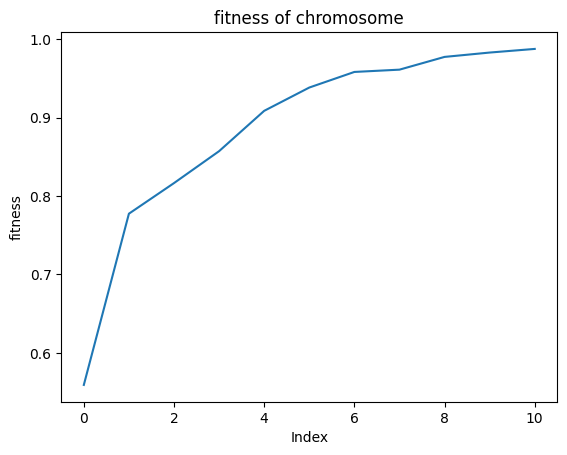

Best rule for detecting spam emails:
 [{'structure': [{'linguistic variable': ['very high', 'very high', 'very high', 'very high'], 'S': [20.650493746935943, 54.51644833567028, 26.93211550557726, 14.426575723305216], 'M': [-6.156168215347906, 4.3821807630103855, -1.0998093100184416, -0.39334489639778525], 'fuzzy set': [2, 1, 4, 3]}, {'linguistic variable': ['low', 'medium', 'high', 'medium'], 'S': [52.48040916428103, 54.38581366968858, 66.69933585508547, 43.328856909749454], 'M': [-4.636411296422711, 4.456737710471494, -6.304426214695644, 1.684484521933717], 'fuzzy set': [2, 2, 2, 1]}, {'linguistic variable': ['very low', 'very low', 'high', 'medium', 'medium'], 'S': [69.08215475968336, 63.47380572195686, 21.403157903456794, 50.02291415636519, 54.71034866197126], 'M': [2.624706591377139, 6.356465161742861, 3.9911661085188683, 0.5451734458756778, -3.347270833888242], 'fuzzy set': [4, 3, 1, 4, 2]}, {'linguistic variable': ['high', 'very low', 'high', 'low'], 'S': [65.09397205513879, 5.83

In [288]:
print('Best rule for detecting spam emails:\n', GA())

In [ ]:
print('Accuracy of the best rule on the test set:', test())

In [290]:
def gC(population, xp):  # nothing
    gr_list=[]
    for i in range(len(population)):
        gr_list.append(Gr(xp, population[i]))
    
    return sum(gr_list)

In [291]:
def predict(population):
    acu_list = []
    rule_bass1 = [population[j] for j in range(len(population)) if population[j][rule][y] == 1]
    rule_bass0 = [population[j] for j in range(len(population)) if population[j][rule][y] == 0]
    for i in range(len(X_test)):
        
        
        gC1 = gC(rule_bass1, X_test[i])
        gC0 = gC(rule_bass0, X_test[i])
        
        label = 0
        # comparing labels with predictions
        if gC1 > gC0:
            label = 1
            
        if labels[i] == label:
            acu_list.append(True)
        else:
            acu_list.append(False)
    
    print('accuracy: ' )
    
    # count True or False in acu_list
    print(acu_list.count(True)/len(acu_list))
        

In [ ]:
# def GA():
#     records_dim_reduced = X_train
#     labels = y_train

#     population = create_chromosomes(num_of_chromosomes)
#     population = evalate_fitness(population)
#     population.sort(key=lambda x: x[fitness], reverse=True)
#     chart_fitness.append(sum([x[fitness] for x in population]) / num_of_chromosomes)

#     for _ in range(num_of_generations):
#         new_generation = create_childs(population)
#         population = select_surviver(population, new_generation)
        
#         chart_fitness.append(sum([x[fitness] for x in population]) / num_of_chromosomes)
        
#         # if _ % 10 == 0:
#         #     chart()
#         #     chart_fitness.clear()
#     chart()
#     chart_fitness.clear()
    
#     # return max(population, key=lambda x: x[fitness])
#     return population

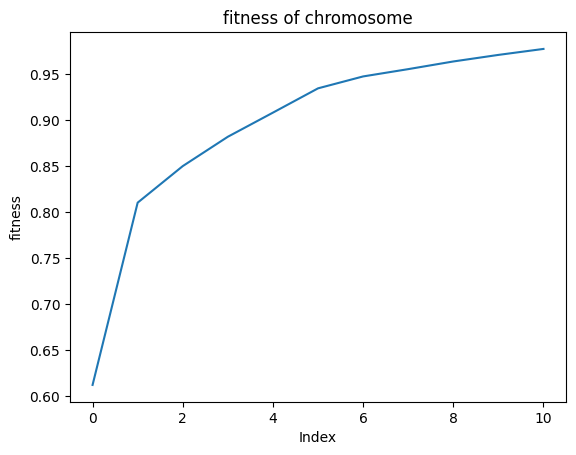

accuracy: 
0.3560538116591928


In [292]:
predict(GA())